# Introduction 

- In this project we discuss the matching for observational data as well as the optimization on matching using graph theory.

## Three Modes of Statistical Inference 

- Descriptive Inference: summarizing and exploring data
- Predictive Inference : forecasting out-of-sample data points
- Causal Inference: predicting counterfactuals


## Matching in Causal Inference
Consider an observed sample of $n$ units taken from a finite population of $N$. 

- In particular, the causal effect for individual $i$ is the comparison of individual $i$’s outcome if individual $i$ receives the treatment (the potential outcome under treatment), $Y_i(1)$, and individual $i$’s outcome if individual $i$ receives the control (the potential outcome under control), ${\color{red}{Y_i(0)}}$. 
- Treatment effect: $$\tau(x)=Y_i(1)-Y_i(0)$$. 
- $\textit{problem:}$ for each individual, we can observe only one of these potential outcomes, because each unit (each individual at a particular point in time) will receive either treatment or control, not both.
- $\textit{solution:}$ we do matching for the $i$th treated individual.
- If there is no imbalance between treatment and control then $\tau(x)=\tau$.



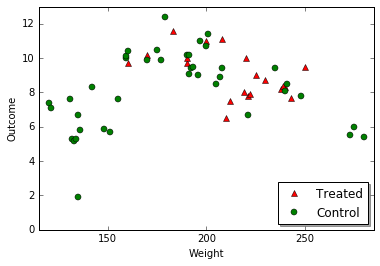

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy import arange,array,ones#,random,linalg
from pylab import plot,show
from scipy import stats

cx = np.array([120, 121, 131, 132, 133, 134, 135, 135, 136, 142, 148, 151, 155, 159, 159,  160,  170,  175, 177,  179,  190,  191, 197, 191, 192, 193, 196,  200, 201, 205, 207, 208, 221, 235, 240, 241, 248, 273, 275, 280])
cy = np.array([7.4, 7.1, 7.6, 5.3, 5.2, 5.3, 1.89, 6.7, 5.8, 8.3, 5.9, 5.7, 7.6, 10, 10.1, 10.4, 9.9, 10.5, 9.9, 12.4, 10.2, 10.2, 11,  9.1, 9.4, 9.5, 9.0, 10.7, 11.4, 8.5, 8.9, 9.4, 6.7, 9.4, 8.1, 8.5, 7.8, 5.5, 6.0, 5.4])
tx = np.array([160,  170,  183, 190,  190, 200,  208, 210, 212, 219, 220, 221, 222, 225, 230, 238, 240, 239, 243, 250])
ty = np.array([9.7, 10.2, 11.6, 9.7, 10.0,  11, 11.1, 6.5, 7.5,   8,  10, 7.8, 7.9, 9.0, 8.7, 8.2, 8.3, 8.4, 7.7, 9.5])

plt.plot(tx, ty, 'r^', label = 'Treated')
plt.plot(cx, cy, 'go', label = 'Control')
plt.xlabel('Weight')
plt.ylabel('Outcome')
plt.axis([115, 285, 0, 13])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.show()
plt.savefig('fig1.pdf')


## Regression Model:

$$y=\beta_0 + \beta_1 x_1+\beta_2 x_2 +\epsilon,$$

where $x_1$ = Causal variable and $x_2$ = Weight. 

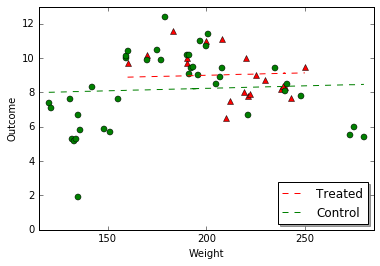

In [21]:
tyhat = np.array([8.89, 8.92, 8.95, 8.97, 8.97, 9.00, 9.02, 9.03, 9.04, 9.06, 9.06, 9.06, 9.06, 9.07, 9.09, 9.11, 9.12, 9.11, 9.12, 9.14])
cyhat = np.array([8.01, 8.01, 8.04, 8.05, 8.05, 8.05, 8.05, 8.05, 8.06, 8.07, 8.09, 8.10, 8.11, 8.12, 8.12, 8.13, 8.15, 8.17, 8.17, 8.18, 8.21, 8.21, 8.23, 8.21, 8.22, 8.22, 8.23, 8.24, 8.24, 8.25, 8.26, 8.26, 8.30, 8.34, 8.35, 8.36, 8.38, 8.45, 8.45, 8.47])
plt.plot(tx, ty, 'r^')
plt.plot(cx, cy, 'go')
plt.plot(tx, tyhat, 'r--', label= 'Treated') 
plt.plot(cx, cyhat, 'g--', label='Control')
plt.xlabel('Weight')
plt.ylabel('Outcome')
#plt.title('Figure 2')
plt.axis([115, 285, 0, 13])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('fig2.pdf')


## Regression Model

$$y=\beta_0 + \beta_1 x_1+\beta_2 x_2 + \beta_3 x^2_2+\epsilon,$$

where $x_1$ = Causal variable and $x_2$ = Weight.

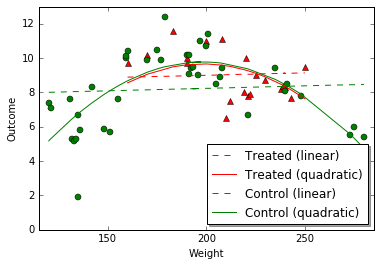

In [22]:
qtyhat = np.array([8.56, 9.06, 9.49, 9.61, 9.61, 9.66, 9.59, 9.55, 9.52, 9.33, 9.30, 9.27, 9.23, 9.12, 8.90, 8.47, 8.34, 8.41, 8.15, 7.64])
qcyhat = np.array([5.18, 5.30, 6.38, 6.48, 6.58, 6.68, 6.77, 6.77, 6.87, 7.40, 7.88, 8.10, 8.37, 8.62, 8.62, 8.68, 9.18, 9.37, 9.44, 9.50, 9.72, 9.74, 9.77, 9.74, 9.75, 9.75, 9.77, 9.77, 9.77, 9.74, 9.72, 9.70, 9.38, 8.76, 8.46, 8.40, 7.91, 5.57, 5.34, 4.75])
plt.plot(tx, ty, 'r^')
plt.plot(cx, cy, 'go')
plt.plot(tx, tyhat, 'r--', label= 'Treated (linear)') 
plt.plot(tx, qtyhat, 'r-', label = 'Treated (quadratic)')
plt.plot(cx, cyhat, 'g--', label='Control (linear)')
plt.plot(cx, qcyhat, 'g-', label ='Control (quadratic)')
plt.xlabel('Weight')
plt.ylabel('Outcome')
#plt.title('Figure 3')
plt.axis([115, 285, 0, 13])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('fig3.pdf')


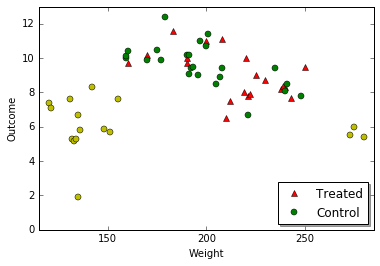

In [5]:
tcx = np.array([159, 159,  160,  170,  175, 177,  179,  190,  191, 197, 191, 192, 193, 196,  200, 201, 205, 207, 208, 221, 235, 240, 241, 248])
tcy = np.array([10, 10.1, 10.4, 9.9, 10.5, 9.9, 12.4, 10.2, 10.2, 11,  9.1, 9.4, 9.5, 9.0, 10.7, 11.4, 8.5, 8.9, 9.4, 6.7, 9.4, 8.1, 8.5, 7.8])
ttx = np.array([160,  170,  183, 190,  190, 200,  208, 210, 212, 219, 220, 221, 222, 225, 230, 238, 240, 239, 243, 250]) 
tty = np.array([9.7, 10.2, 11.6, 9.7, 10.0,  11, 11.1, 6.5, 7.5,   8,  10, 7.8, 7.9, 9.0, 8.7, 8.2, 8.3, 8.4, 7.7, 9.5])
ecx = np.array([120, 121, 131, 132, 133, 134, 135, 135, 136, 142, 148, 151, 155, 273, 275, 280])
ecy = np.array([7.4, 7.1, 7.6, 5.3, 5.2, 5.3, 1.89, 6.7, 5.8, 8.3, 5.9, 5.7, 7.6, 5.5, 6.0, 5.4])
plt.plot(ttx, tty, 'r^', label = 'Treated')
plt.plot(tcx, tcy, 'go', label = 'Control')
plt.plot(ecx, ecy, 'yo')
plt.xlabel('Weight')
plt.ylabel('Outcome')
plt.axis([115, 285, 0, 13])
#plt.title('Figure 4')
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('fig4.pdf')
#plt.savefig('tmp12.jpg')


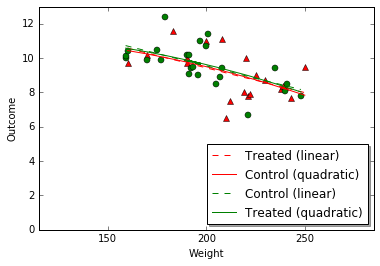

In [6]:
ttyhat = np.array([10.58, 10.29,  9.92,  9.72,  9.72,  9.43,  9.20,  9.14,  9.08,  8.88,  8.85,  8.82,  8.80, 8.71,  8.57,  8.33,  8.28,  8.31,  8.19,  7.99])
tcyhat = np.array([10.73, 10.73, 10.70, 10.41, 10.27, 10.21, 10.15,  9.83,  9.81,  9.63,  9.81,  9.78,  9.75, 9.66,  9.55,  9.52,  9.40,  9.35,  9.32,  8.94,  8.54,  8.40,  8.37,  8.17])
qttyhat = np.array([10.44, 10.24,  9.94,  9.77,  9.77,  9.50,  9.27,  9.21,  9.15,  8.93,  8.90,  8.87,  8.83, 8.74,  8.57,  8.28,  8.21,  8.25,  8.10,  7.84])
qtcyhat = np.array([10.58, 10.58, 10.56, 10.36, 10.25, 10.20, 10.16,  9.89,  9.86,  9.70,  9.86,  9.83,  9.81, 9.73,  9.62,  9.59,  9.48,  9.42,  9.39,  8.99,  8.51,  8.33,  8.29,  8.03])
plt.plot(ttx, tty, 'r^')
plt.plot(tcx, tcy, 'go')
#plt.plot(ecx, ecy, 'yo')
plt.plot(ttx, ttyhat, 'r--', label= 'Treated (linear)') 
plt.plot(ttx, qttyhat, 'r-', label = 'Control (quadratic)')
plt.plot(tcx, tcyhat, 'g--', label='Control (linear)')
plt.plot(tcx, qtcyhat, 'g-', label ='Treated (quadratic)')
plt.xlabel('Weight')
plt.ylabel('Outcome')
#plt.title('Figure 5')
plt.axis([115, 285, 0, 13])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('fig5.pdf')


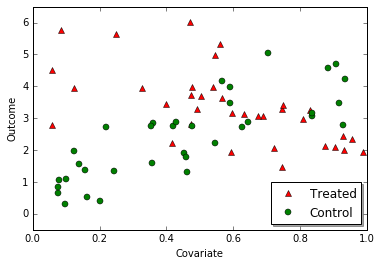

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy import arange,array,ones#,random,linalg
from pylab import plot,show
from scipy import stats

cx = np.array([0.591, 0.125, 0.361, 0.627, 0.140, 0.882, 0.906, 0.642, 0.162, 0.075, 0.934, 0.243, 0.590, 0.079, 0.158, 0.358, 0.546, 0.220, 0.200, 0.353, 0.096, 0.451, 0.476, 0.419, 0.916, 0.075, 0.462, 0.928, 0.100, 0.458, 0.566, 0.835, 0.834, 0.702, 0.428])
cy = np.array([3.969, 1.962, 2.839, 2.709, 1.554, 4.577, 4.703, 2.887, 0.530, 0.666, 4.239, 1.351, 3.491, 1.058, 1.390, 1.604, 2.236, 2.723, 0.397, 2.760, 0.295, 1.894, 2.759, 2.755, 3.482, 0.839, 1.310, 2.777, 1.104, 1.773, 4.151, 3.069, 3.173, 5.052, 2.888])
tx = np.array([0.472, 0.593, 0.471, 0.399, 0.565, 0.326, 0.927, 0.931, 0.954, 0.902, 0.057, 0.472, 0.490, 0.476, 0.688, 0.250, 0.744, 0.874, 0.058, 0.085, 0.502, 0.124, 0.545, 0.561, 0.747, 0.674, 0.416, 0.829, 0.745, 0.595, 0.720, 0.540, 0.631, 0.988, 0.808])
ty = np.array([2.818, 1.933, 6.008, 3.435, 3.621, 3.960, 2.442, 1.996, 2.335, 2.101, 2.791, 3.726, 3.301, 3.979, 3.081, 5.646, 3.292, 2.120, 4.499, 5.752, 3.710, 3.942, 4.974, 5.324, 3.411, 3.068, 2.218, 3.267, 1.477, 3.158, 2.061, 3.969, 3.143, 1.953, 2.974])

plt.plot(tx, ty, 'r^', label = 'Treated')
plt.plot(cx, cy, 'go', label = 'Control')
plt.xlabel('Covariate')
plt.ylabel('Outcome')
plt.axis([0, 1, -0.5, 6.5])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('het1.pdf')


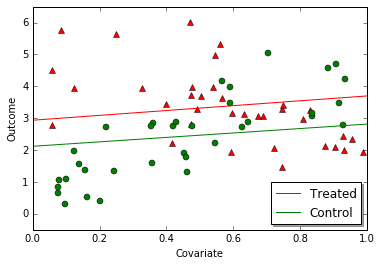

In [57]:
#tyhat = np.array([3.272, 3.371, 3.272, 3.213, 3.348, 3.154, 3.641, 3.645, 3.663, 3.621, 2.936, 3.272, 3.287, 3.276, 3.448, 3.093, 3.493, 3.598, 2.937, 2.959, 3.297, 2.991, 3.332, 3.345, 3.496, 3.436, 3.227, 3.561, 3.494, 3.372, 3.473, 3.328, 3.402, 3.691, 3.544])
#cyhat = np.array([2.538, 2.160, 2.351, 2.566, 2.172, 2.773, 2.793, 2.579, 2.190, 2.119, 2.816, 2.255, 2.537, 2.123, 2.186, 2.349, 2.501, 2.237, 2.221, 2.345, 2.136, 2.424, 2.445, 2.398, 2.801, 2.119, 2.433, 2.810, 2.139, 2.430, 2.517, 2.735, 2.735, 2.627, 2.405])

ttx = np.array([0,1])
tyhat =np.array([2.9359, 3.699])
ccx = np.array([0,1])
cyhat =np.array([2.119, 2.8159])

plt.plot(tx, ty, 'r^')
plt.plot(cx, cy, 'go')
plt.plot(ttx, tyhat, 'r-', label= 'Treated') 
plt.plot(ccx, cyhat, 'g-', label='Control')
plt.xlabel('Covariate')
plt.ylabel('Outcome')
#plt.title('Figure 2')
plt.axis([0, 1, -0.5, 6.5])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('het2.pdf')



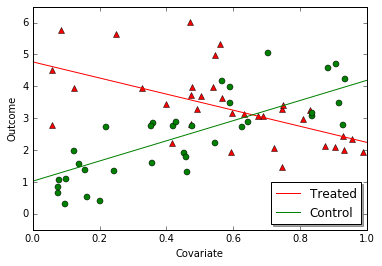

In [60]:
tttx = np.array([0,1])
tyhat =np.array([4.766904, 2.237922])
cccx = np.array([0,1])
cyhat =np.array([1.023968, 4.192627])

plt.plot(tx, ty, 'r^')
plt.plot(cx, cy, 'go')
plt.plot(tttx, tyhat, 'r-', label= 'Treated') 
plt.plot(cccx, cyhat, 'g-', label='Control')
plt.xlabel('Covariate')
plt.ylabel('Outcome')
#plt.title('Figure 2')
plt.axis([0, 1, -0.5, 6.5])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('het3.pdf')



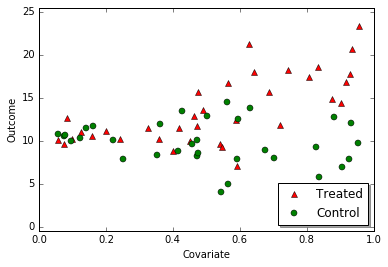

In [97]:
ncx = np.array([0.057, 0.075, 0.079, 0.096, 0.124, 0.140, 0.162, 0.220, 0.250, 0.353, 0.361, 0.416, 0.428, 0.458, 0.471, 0.472, 0.476, 0.502, 0.545, 0.561, 0.566, 0.591, 0.595, 0.631, 0.674, 0.702, 0.744, 0.747, 0.829, 0.835, 0.882, 0.906, 0.927, 0.931, 0.954])
ncy = np.array([10.737, 10.512, 10.677,  9.932, 10.293, 11.438, 11.753, 10.133,  7.860,  8.380, 11.937,  8.847, 13.510,  9.639, 10.079,  8.261,  8.562, 12.836,  3.991, 14.489, 4.953,  7.882, 12.557, 13.773,  8.882,  8.001,  2.728,  3.226,  9.217,  5.823, 12.710,  6.958,  7.872, 12.057, 9.722])
ntx = np.array([0.058, 0.075, 0.085, 0.100, 0.125, 0.158, 0.200, 0.243, 0.326, 0.358, 0.399, 0.419, 0.451, 0.462, 0.472, 0.476, 0.490, 0.540, 0.546, 0.565, 0.590, 0.593, 0.627, 0.642, 0.688, 0.720, 0.745, 0.808, 0.834, 0.874, 0.902, 0.916, 0.928, 0.934, 0.955])
nty = np.array([10.112,  9.613, 12.633, 10.234, 11.019, 10.558, 11.142, 10.233, 11.465, 10.165, 8.761, 11.511,  9.916, 12.845, 11.658, 15.625, 13.559,  9.642,  9.262, 16.745, 12.366,  7.032, 21.213, 18.030, 15.685, 11.874, 18.186, 17.390,  18.591, 14.865, 14.374, 16.824, 17.776, 20.650, 23.410])

plt.plot(ntx, nty, 'r^', label = 'Treated')
plt.plot(ncx, ncy, 'go', label = 'Control')
plt.xlabel('Covariate')
plt.ylabel('Outcome')
plt.axis([0, 1, -.5, 25.5])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('zet1.pdf')



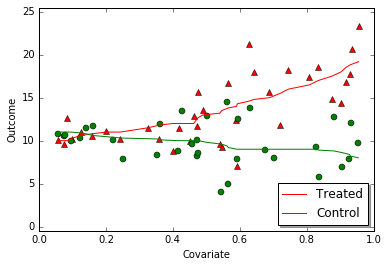

In [98]:
ntyhat =np.array([10, 10, 10, 10.3, 10.6, 10.8, 11, 11, 11.5, 11.8, 12, 12, 12, 12, 12.5, 12.7, 13, 13.2, 13.5, 13.8, 14, 14.3, 14.6, 14.8, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 18.8, 18.9, 19.2])
ncyhat =np.array([11, 11, 11, 11, 10.9, 10.8, 10.6, 10.4, 10.3, 10.2, 10.1, 10, 10, 10, 10, 10, 10,  9.8,  9.6,  9.4,  9.2,  9,  9, 9, 9,  9,  9,  9,  9,  8.9,  8.8,  8.6,  8.4,  8.2,  8])

plt.plot(ntx, nty, 'r^')
plt.plot(ncx, ncy, 'go')
plt.plot(ntx, ntyhat, 'r-', label= 'Treated') 
plt.plot(ncx, ncyhat, 'g-', label='Control')
plt.xlabel('Covariate')
plt.ylabel('Outcome')
#plt.title('Figure 2')
plt.axis([0, 1, -.5, 25.5])
legend = plt.legend(loc='lower right', shadow= True, numpoints = 1)
plt.savefig('zet2.pdf')



## The Problem Matching Solves:

### Without Matching:

    - Imbalance ---> Model dependency ---> Researcher discretion ---> Biased.
    
### With Matching    
    - Balance ---> No Model dependency ---> No Researcher discretion ---> Unbiased.

## Distance Measures 

- Exact: 
\begin{equation}
D_{ij} = \left\{
\begin{array}{rl}
0 & \text{if} \quad X_i=X_j\\
\infty & \text{if}\quad X_i\neq X_j.
\end{array} \right.
\end{equation}
- Mahalanobis: $$D_{ij} = (X_i-X_j)^\prime \Sigma^{-1} (X_i-X_j)$$

If interest is in the ATT, $\Sigma$ is the variance covariance matrix of $X$ in the full control group; if interest is in the ATE then $\Sigma$ is the variance covariance matrix of $X$ in the pooled treatment and full control groups. If $X$ contains categorical variables they should be converted to a series of binary indicators, although the distance works best with continuous variables.

- Propensity score: $D_{ij}=|e_i-e_j|$, where $e_k$ is the propensity score for individual $k$.

Propensity score matching (PSM) is a statistical matching technique that attempts to estimate the effect of a treatment, policy, or other intervention by accounting for the covariates that predict receiving the treatment. 

- Linear propensity score: $D_{ij}=|logit(e_i)-logit(e_j)|$ 

It found that matching on the linear propensity score can be particularly effective in terms of reducing bias


## Goals in matching

- Sample Average Treatment Effect (SATE): $$\frac{1}{n} \sum_{i=1}^n [Y_i(1)- Y_i(0)].$$
- Population Average Treatment Effect (PATE): $${E} [Y_i(1)-Y_i(0)].$$



In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import sympy
from pandas import DataFrame
from sympy import *
import numpy as np
init_printing()
from IPython.display import Image 
%matplotlib inline
def readnet(input_file, sep_char, comment_char):
    """
    
    """
    num_lines = 0
    G = nx.DiGraph()
    for line in open(input_file):
        num_lines += 1
        if line[0] != comment_char:
            line = line.rstrip().split(sep_char)
            if len(line) == 2:
                G.add_edge(int(line[0]) , int(line[1]))
                if num_lines < 10:
                    print line[0] + " " + line[1]
                if num_lines == 10:
                    print "..."
            elif len(line) == 3:
                G.add_edge(int(line[0]) , int(line[1]), weight = int(line[2]))
                if num_lines < 10:
                    print line[0] + " " + line[1]+" weight is "+ line[2]
                if num_lines == 10:
                    print "..."
    print 'Read ' + str(num_lines) + 'lines.'
    print 'Network has %d nodes and %d edges.' % (G.number_of_nodes(), G.number_of_edges())
    return G

ImportError: cannot import name domain

## Steps in implementing matching methods

Matching methods have four key steps (Stuart (2010)), with the first three representing the “design” and the fourth the “analysis:”

- Defining “closeness”: the distance measure used to determine whether an individual is a good match for another,
- Implementing a matching method, given that measure of closeness,
- Assessing the quality of the resulting matched samples, and perhaps iterating with Steps (1) and (2) until well-matched samples result, and
- Analysis of the outcome and estimation of the treatment effect, given the matching done in Step (3). 

## Matching in Randomized experiment

Randomized experiments use a known randomized assignment mechanism to ensure “balance” of the covariates between the treated and control groups: The groups will be only randomly different from one another on all covariates, observed and unobserved. 

## Matching problem in observational data

-  An observational study is an attempt to estimate the effects of a treatment when, for ethical or practical reasons, it is not possible to randomly assign units to treatment or control.
- Let us consider we have $N$ treated and $M$ control units, $M\geq N$. A match pair is an ordered pair $(n,m)$, indicating $n$th treated unit is matched with $m$th control.
- Different types of matching: \emph{complete matched-pair sample} and \emph{incomplete matched-pair sample}.
- A pair $(n,m)$ is closely matched if ${x_n}$ is close to ${w_m}$ are in some sense, for instance close in terms of distance $\delta(x_n,w_m)$ or rank.
- In a matched sample $\mathcal{T}$, the total distance between matched pairs, $\sum_{(n,m)\in\mathcal{T}} \delta(x_n,w_m)$ is one measure of the quality of the matched sample.

## Example: Optimal Matching Versus a Greedy Heuristic
The example uses the now-familiar data on 26 U.S. light water nuclear power plant 

- The distance between two plants is defined in terms of two covariates: the date the construction permit was issued and the capacity of the power plant



In [13]:
TT = [[28, 24, 10, 7, 17, 20, 14],
[0 , 3 , 18,28, 20, 31, 32],
[3 , 0, 14, 24, 16, 28, 29],
[22, 22, 18, 8, 32, 35, 30],
[14, 1 , 4, 14, 18, 20, 18],
[30, 27, 12, 2, 26, 29, 24],
[17, 14, 5, 10, 20, 22, 17],
[28, 26, 11, 6, 18, 20, 16],
[26, 24, 9, 12, 12, 14, 9],
[28, 24, 10, 0, 24, 26, 22],
[20, 16, 14, 24, 0, 12, 12],
[22, 19, 12, 22, 2,  9, 10],
[23, 20,  5, 4, 20, 22, 17],
[26, 23, 14, 24, 6,  5, 6],
[21, 18, 22, 32, 7, 15, 16],
[18, 16, 10, 20, 4, 12, 14],
[34, 31, 16, 18, 14, 9, 4],
[40, 37, 22, 16, 20, 11, 5],
[28, 25, 28, 38, 14, 12, 17]]
print 'Distances Between Treated and Control Power Plants Treated plants'
print 'Treated plants in columns vs Control plants in row'
df = DataFrame(TT, columns=[3,5,9,18,20,22,24], index=[1, 2, 4, 6,7,8,10,11,12,13,14,15,16,17,19,21,23,25,26])
df


Distances Between Treated and Control Power Plants Treated plants
Treated plants in columns vs Control plants in row


3   5   9   18  20  22  24
1   28  24  10   7  17  20  14
2    0   3  18  28  20  31  32
4    3   0  14  24  16  28  29
6   22  22  18   8  32  35  30
7   14   1   4  14  18  20  18
8   30  27  12   2  26  29  24
10  17  14   5  10  20  22  17
11  28  26  11   6  18  20  16
12  26  24   9  12  12  14   9
13  28  24  10   0  24  26  22
14  20  16  14  24   0  12  12
15  22  19  12  22   2   9  10
16  23  20   5   4  20  22  17
17  26  23  14  24   6   5   6
19  21  18  22  32   7  15  16
21  18  16  10  20   4  12  14
23  34  31  16  18  14   9   4
25  40  37  22  16  20  11   5
26  28  25  28  38  14  12  17

## Comparing Greedy and Optimal Matching with an example
Suppose there are N treated units having covariate values 2,4,...,2N and an equal number of potential controls having covariate values 1-$\epsilon$, 3-$\epsilon$,...,2N-1-$\epsilon$, where $\epsilon$ >0 is vanishingly small.
Suppose that the absolute difference in the covariate values is used as the measure of distance. Then, 2 is slightly closer to 3-$\epsilon$ and to 1-$\epsilon$, and so forth. 

- Greedy Matching: 2 with 3-$\epsilon$, 3 with 4-$\epsilon$, and so on, and is finally forced to pair 2N with the only unmatched treated unit, namely 1-$\epsilon$. If the covariate were age,this would mean matching the oldest treated unit to the youngest control. The total absolute difference within N pairs is (N-1)+(2N-1).
- Optimal Matching: The optimal procedure pairs 2 with 1-$\epsilon$, 3 with 2-$\epsilon$, and so on, for a total distance of N.

So, the percent increase in distance due to using greedy rather than optiomal matching is 200% as N goes to $\infty$, so greedy can be quite poor in large problems as well as small ones. 

###A paper by Paul R. Rosenbaum
Journal of the American Statistical Association
Vol. 84, No. 408 (Dec., 1989), pp. 1024-1032

In [10]:
Image(filename='Greedy and optimal3.jpg')

NameError: name 'Image' is not defined

## Comparing Greedy and Optimal Matching

- First, there is the obvious point that the optimal match is always as good as and often better than the greedy match.
- The second point, though distinct, is closely related to the first. Although a greedy algorithm (like forward stepwise regression) may provide a tolerable answer, it rarely comes with a guarantee that the answer is in fact tolerable. Greedy matching can be arbitrarily poor compared to optimal matching
- greedy grabs the (1, 1) match at a cost of 0, can never reconsider, and is forced to pay a cost of $\infty$ for the (2, 2) match. Of course, the optimal match is (1, 2) and (2, 1) with a cost of $2\epsilon$.
-  The third reason for preferring an optimal match is relevant when there are calipers, such as the propensity score caliper. Calipers forbid the matching of certain treated units to certain controls. When there are calipers, a complete pair matching may or may not exist. Even if a complete pair matching exists, greedy may not find it, whereas the optimal matching procedure  will always find a complete pair matching if it exist.

# Modeling Matchings by using bipartite graph

We uses bipartite graph to modele machings.  Bipartite graphs very often arise naturally. There are many real-world problems that can be formed as Bipartite Matching. For example, consider the following examples:

### Real-life  Examples of Bipartite Matching

##### 1-Online dating:
Assume maching.com receive applications from 4 men['Adam','Bob','Alex','Jeff'] amd 4 women['Sarah','Rita','Ema','Ana']
after filling in their details, the match.com algorithem work out the following:

-Jeff appears to be compatible with all 4 women


-Alex appears to be compatible  with Rita


-Bob appears to be compatible with Rita and Sarah


-Adam appears to be compatible with Sarah and Ana

#### Model the situation by drawing a Bipartite graph


In [0]:
import networkx as nx
import matplotlib
%matplotlib inline

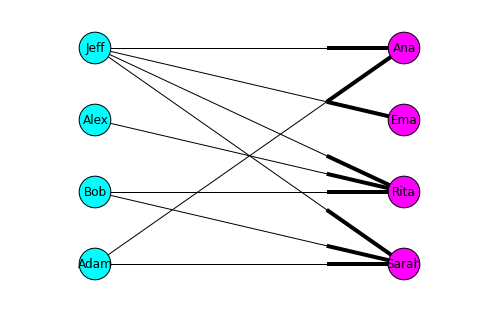

In [51]:
B = nx.DiGraph()
B.add_nodes_from(['Sarah','Rita','Ema','Ana'], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['Adam','Bob','Alex','Jeff'])
B.add_edges_from([('Sarah','Adam'), ('Sarah','Bob'), ('Rita','Bob'), ('Rita','Alex'), ('Ana','Adam'),('Sarah','Jeff'),('Rita','Jeff'),('Ema','Jeff'),('Ana','Jeff')])
B = B.reverse()
pos = {'Sarah':[1,0],'Rita':[1,1],'Ema':[1,2],'Ana':[1,3],'Adam':[0,0],'Bob':[0,1],'Alex':[0,2],'Jeff':[0,3]}
nx.draw(B,pos)
nx.draw_networkx_nodes(B, pos, nodelist= ['Sarah','Rita','Ema','Ana'], node_color='magenta', node_size=1000)
nx.draw_networkx_nodes(B, pos, nodelist= ['Adam', 'Bob', 'Alex', 'Jeff'], node_color='cyan', node_size=1000)
# nx.draw_networkx_edge_labels(B, pos, edge_labels={('Ana','Adam'):(),('Rita','Alex'):()}, label_pos=0.7, font_size=10, font_color='k', font_family='sans-serif')




#### 2-Employment:

    
   
There are 4 job applicants (['Adam','Bob','Alex','Jeff']) and 4 jobs([baker, Chef, bartender, Cashier]}. Each applicant has a subset of jobs that he is interested in. 

Each job opening can only accept one applicant and a job applicant can be appointed for only one job. 





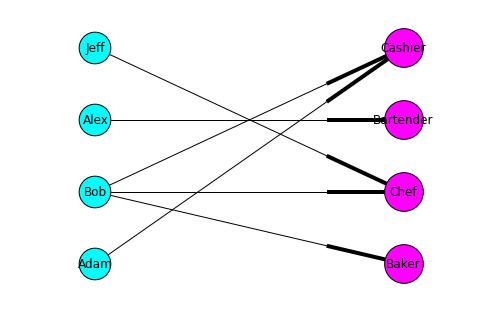

In [68]:
B = nx.DiGraph()
B.add_nodes_from(['Baker','Chef','Bartender','Cashier'], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['Adam','Bob','Alex','Jeff'])
B.add_edges_from([ ('Baker','Bob'), ('Chef','Bob'), ('Bartender','Alex'), ('Cashier','Adam'),('Cashier','Bob'),('Chef','Jeff'),('Baker','Bob')])
B = B.reverse()
pos = {'Baker':[1,0],'Chef':[1,1],'Bartender':[1,2],'Cashier':[1,3],'Adam':[0,0],'Bob':[0,1],'Alex':[0,2],'Jeff':[0,3]}
nx.draw(B,pos)
nx.draw_networkx_nodes(B, pos, nodelist= ['Baker','Chef','Bartender','Cashier'], node_color='magenta', node_size=1500)
nx.draw_networkx_nodes(B, pos, nodelist= ['Adam', 'Bob', 'Alex', 'Jeff'], node_color='cyan', node_size=1000)
# nx.draw_networkx_edge_labels(B, pos, edge_labels={('Ana','Adam'):(),('Rita','Alex'):()}, label_pos=0.7, font_size=10, font_color='k', font_family='sans-serif')


### 3-talent show:
    In this example, we are planning a talent show for a group of students. Each student can only perform a specific set of talents, and no two students can perform the same talent. Our goal is to find the optimal pairing of students to talents in order to have the most acts in our talent show.

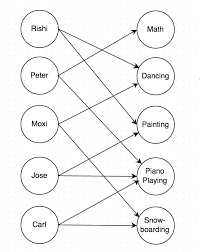

In [212]:
Image(filename='talent show.jpg') 

## Bipartite Matching:

A Bipartite Graph G = (V, E) is a graph in which the vertex set V can be divided into two disjoint
subsets L and R such that every edge e ∈ E has one end point in L and the other end point in R . So no edge connects two vertices of the same set.
A matching M is a subset of edges such that each node in V appears in at most one edge in M.

A balanced bipartite graph is one that has an equal number of left and right vertices.


In [3]:
Image(filename='bipartite.jpg') 

NameError: name 'Image' is not defined


### Maximum Bipartite Matching

A matching in a Bipartite Graph is a set of the edges chosen in such a way that no two edges share an endpoint. 

A maximum matching is a matching of maximum size (maximum number of edges). 

In a maximum matching, if any edge is added to it, it is no longer a matching.

There can be more than one maximum matchings for a given Bipartite Graph.

In first example: we assigns men to women such that maximum marriages occurs.
In the second example finding an assignment of jobs to applicants in such that as many applicants as possible get jobs.


### Maximum weighted Matching in Bipartite graphs

In a weighted bipartite graph, each edge has an associated value.

A maximum weighted bipartite matching is defined as a matching where the sum of the values of the edges in the matching have a maximal value.

So we want to match those pairs of nodes in a way that the total weight of matched edges is maximum.


### Lets get back to our problem
#### An Example in observational studies: "control and treated power plant"
"
The example uses the now-familiar data on 26 U.S. light
water nuclear power plants, as collected by W. E. Mooz
and as reported by Cox and Snell (1981). (Excluded are
the six "partial turnkey" plants, whose costs may contain
hidden subsidies.) Seven of the plants were constructed
on a site at which a light water reactor had previously
existed; they are the treated units. Each such unit will be
matched with two controls from among the remaining 19
plants. A comparison of the costs of the treated and control
plants might be the basis for thinking about the advantages
or disadvantages of building a new plant at an existing site."


In [178]:
G = readnet('TreatedTreeFixed.txt', "\t", "#" )

1 3 weight is 28
1 5 weight is 24
1 9 weight is 10
1 18 weight is 7
1 20 weight is 17
1 22 weight is 10
1 24 weight is 14
2 3 weight is 0
...
Read 134lines.
Network has 26 nodes and 133 edges.


In [179]:
T = set()
C = set()
for (i,j) in G.edges():
    T.add(i)
    C.add(j)

In [180]:
G = G.to_undirected()

{1: <matplotlib.text.Text at 0x7fab15374910>,
 2: <matplotlib.text.Text at 0x7fab1530dc10>,
 3: <matplotlib.text.Text at 0x7fab15318090>,
 4: <matplotlib.text.Text at 0x7fab153184d0>,
 5: <matplotlib.text.Text at 0x7fab15318910>,
 6: <matplotlib.text.Text at 0x7fab15318d50>,
 7: <matplotlib.text.Text at 0x7fab153241d0>,
 8: <matplotlib.text.Text at 0x7fab15324610>,
 9: <matplotlib.text.Text at 0x7fab15324a50>,
 10: <matplotlib.text.Text at 0x7fab15324e90>,
 11: <matplotlib.text.Text at 0x7fab1532f310>,
 12: <matplotlib.text.Text at 0x7fab1532f750>,
 13: <matplotlib.text.Text at 0x7fab1532fb90>,
 14: <matplotlib.text.Text at 0x7fab1532ffd0>,
 15: <matplotlib.text.Text at 0x7fab1533c450>,
 16: <matplotlib.text.Text at 0x7fab1533c890>,
 17: <matplotlib.text.Text at 0x7fab1533ccd0>,
 18: <matplotlib.text.Text at 0x7fab152c6150>,
 19: <matplotlib.text.Text at 0x7fab152c6590>,
 20: <matplotlib.text.Text at 0x7fab152c69d0>,
 21: <matplotlib.text.Text at 0x7fab152c6e10>,
 22: <matplotlib.text.

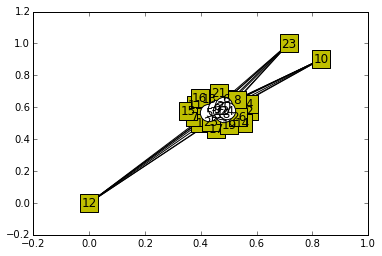

In [186]:
pos = nx.spring_layout(G)
fig = plt.figure()
nx.draw_networkx_nodes(G, pos = pos, nodelist=list(T), node_color='y', node_shape='s')
nx.draw_networkx_nodes(G, pos = pos, nodelist=list(C), node_color='w', node_shape='o')
nx.draw_networkx_edges(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos)

#### In what follows we plot the graph in a bipartite layout

(By assigning the coordinates to each node. Treated nodes in right column and Controlled in left.)

In [2]:
T_list = list(T)
C_list = list(C)
One = np.ones(len(T_list))
Z = np.zeros(len(C_list))
pos1 = zip(10*One, range(len(T_list)))
pos2 = zip(Z, range(len(C_list)))
pos1_d = dict(zip(T_list, pos1))
pos2_d = dict(zip(C_list, pos2))
pos1_d.update(pos2_d)

NameError: name 'T' is not defined

{1: <matplotlib.text.Text at 0x7fab14dd84d0>,
 2: <matplotlib.text.Text at 0x7fab14dd8990>,
 3: <matplotlib.text.Text at 0x7fab14dd8dd0>,
 4: <matplotlib.text.Text at 0x7fab14de5250>,
 5: <matplotlib.text.Text at 0x7fab14de5690>,
 6: <matplotlib.text.Text at 0x7fab14de5ad0>,
 7: <matplotlib.text.Text at 0x7fab14de5f10>,
 8: <matplotlib.text.Text at 0x7fab14df1390>,
 9: <matplotlib.text.Text at 0x7fab14df17d0>,
 10: <matplotlib.text.Text at 0x7fab14df1c10>,
 11: <matplotlib.text.Text at 0x7fab14d7e090>,
 12: <matplotlib.text.Text at 0x7fab14d7e4d0>,
 13: <matplotlib.text.Text at 0x7fab14d7e910>,
 14: <matplotlib.text.Text at 0x7fab14d7ed50>,
 15: <matplotlib.text.Text at 0x7fab14d891d0>,
 16: <matplotlib.text.Text at 0x7fab14d89610>,
 17: <matplotlib.text.Text at 0x7fab14d89a50>,
 18: <matplotlib.text.Text at 0x7fab14d89e90>,
 19: <matplotlib.text.Text at 0x7fab14d96310>,
 20: <matplotlib.text.Text at 0x7fab14d96750>,
 21: <matplotlib.text.Text at 0x7fab14d96b90>,
 22: <matplotlib.text.

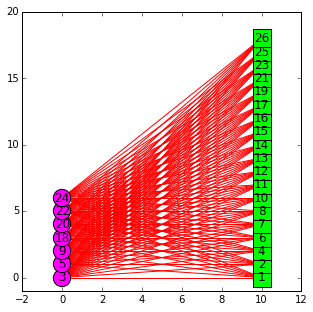

In [215]:
pos = pos1_d
fig = plt.figure(figsize=(5,5))
plt.axis([-2, 12, -1, 20])
nx.draw_networkx_nodes(G, pos = pos, nodelist=list(T), node_color='lime', node_shape='s')
nx.draw_networkx_nodes(G, pos = pos, nodelist=list(C), node_color='magenta', node_shape='o')
nx.draw_networkx_edges(G, pos = pos, edge_color= 'r')
nx.draw_networkx_labels(G, pos = pos)

 ## Problems with solving max weighted matching
 
 
 There is not any polynomial time method to solve maximom weighted matching in a general graph.
 Fortunetly, for a bipartite graph we can solve a problem with polinomial time!

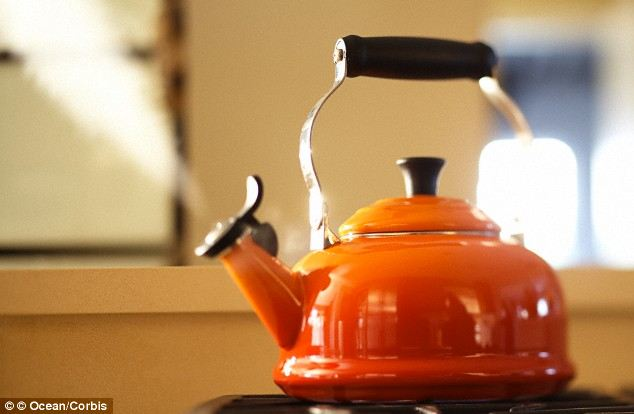

In [69]:
Image(filename='kettle.jpg') 

## A well-known Joke!

Joke!
To tell a difference between a mathematician and an engineer, perform
this experiment.  Put an empty kettle in the middle of the kitchen
floor and tell your subjects to boil some water.

The engineer will fill the kettle with water, put it on the stove, and
turn the flame on.  The mathematician will do the same thing.

Next, put the kettle already filled with water on the stove, and ask
the subjects to boil the water.  The engineer will turn the flame on.
The mathematician will empty the kettle and put it in the middle of
the kitchen floor... thereby reducing the problem to one that has
already been solved!

#### We Do the same trick, and we transform problem of maximum weighted matching to a well-known problem that is already solved: max flow problem.

### Transforming Max Weighted Matching to Max Flow

Maximum Bipartite Matching (MBP) problem can be solved by converting it into a flow network 

Following are the steps.

1) Build a Flow Network

There must be a source and sink in a flow network.

So we add a source and add edges from source to all applicants. Such that $w(s,v)=0$ and $w(u,t)=0$, $\forall v\in V_l$ and $u\in V_r$

Capacity (maximum possible flow) in every link is $1$. Because each link can carry a matching.


In [1]:
B = nx.DiGraph()
B.add_nodes_from(['Sarah','Rita','Ema','Ana'], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['Adam','Bob','Alex','Jeff'])
B.add_edges_from([('Sarah','Adam'), ('Sarah','Bob'), ('Rita','Bob'), ('Rita','Alex'), ('Ana','Adam'),('Sarah','Jeff'),('Rita','Jeff'),('Ema','Jeff'),('Ana','Jeff')])
B = B.reverse()
B.add_nodes_from(['s', 't'])
B.add_edges_from([('s', 'Jeff'),('s', 'Alex'),('s', 'Bob'),('s', 'Adam'),('Sarah','t') ,('Rita','t'),('Ema','t'),('Ana', 't')])
pos = {'Sarah':[1,0],'Rita':[1,1],'Ema':[1,2],'Ana':[1,3],'Adam':[0,0],'Bob':[0,1],'Alex':[0,2],'Jeff':[0,3], 's': [-1,1.5], 't': [2,1.5]}
nx.draw(B,pos)
nx.draw_networkx_nodes(B, pos, nodelist=['Sarah','Rita','Ema','Ana'], node_color='magenta', node_size=1000)
nx.draw_networkx_nodes(B, pos, nodelist= ['Adam', 'Bob', 'Alex', 'Jeff'], node_color='cyan', node_size=1000)
nx.draw_networkx_edge_labels(B, pos, edge_labels={('s', 'Jeff'):(1,0),('s', 'Alex'):(1,0),('s', 'Bob'):(1,0),('s', 'Adam'):(1,0),('Sarah','t'):(1,0),('Rita','t'):(1,0),
                                                  ('Ema','t'):(1,0),('Ana', 't'):(1,0),('Sarah','Adam'):(1,'w'), ('Sarah','Bob'):(1,'w'), ('Rita','Bob'):(1,'w'), ('Rita','Alex'):(1,'w'),
                                                  ('Ana','Adam'):(1,'w'),('Sarah','Jeff'):(1,'w'),('Rita','Jeff'):(1,'w'),('Ema','Jeff'):(1,'w'),('Ana','Jeff'):(1,'w')}, label_pos=0.7,
                             font_size=10, font_color='k', font_family='sans-serif')

NameError: name 'nx' is not defined

### Solving our problem

NetworkX has bult-in algorithms to find maximum weigthted matching and maximum cardinality matching.

In [193]:
def MatchedG(G, M):
    Matching = 0
    G_M = nx.Graph()
    for i in M:
        G_M.add_edge(i, M[i])
        Matching += G[i][M[i]]['weight']
    return G_M, Matching

In [192]:
M = nx.max_weight_matching(G, maxcardinality=False)
G_M, MatchSize = MatchedG(G, M)

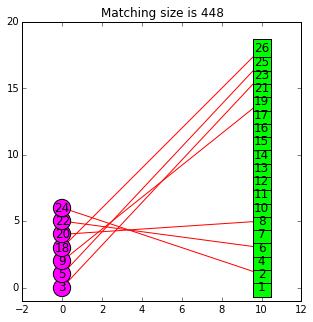

In [225]:
pos = pos1_d
fig = plt.figure(figsize=(5,5))
plt.axis([-2, 12, -1, 20])
nx.draw_networkx_nodes(G, pos = pos, nodelist=list(T), node_color='lime', node_shape='s')
nx.draw_networkx_nodes(G, pos = pos, nodelist=list(C), node_color='magenta', node_shape='o')
# nx.draw_networkx_edges(G, pos = pos, edge_color= 'gray')
nx.draw_networkx_edges(G_M, pos = pos, edge_color= 'r')
nx.draw_networkx_labels(G, pos = pos)
plt.title('Matching size is {}'.format(MatchSize))

2) Find the maximum flow.


We use Ford-Fulkerson algorithm to find the maximum flow in the flow network built in step 1.

The maximum flow is actually the MBP we are looking for.



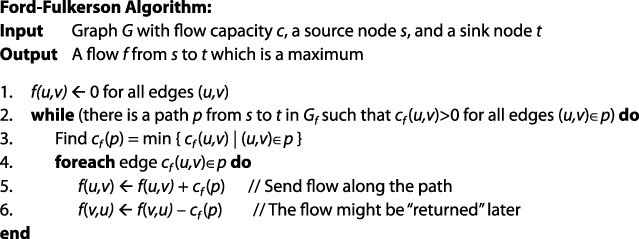

In [6]:
Image(filename='ford fulkerson algorithm.jpg')

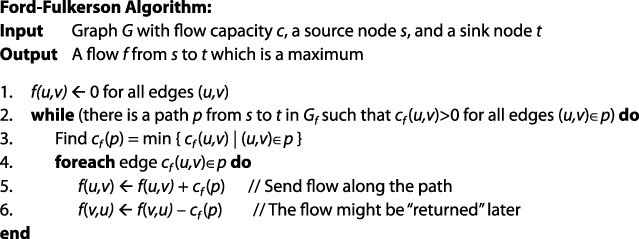

In [6]:
Image(filename='ford fulkerson algorithm.jpg')

◮A simple and practical max-flow algorithm


◮ Main idea: find valid flow paths until there is none left, and
add them up


◮ How do we know if this gives a maximum flow?
  – Proof sketch: Suppose not. Take a maximum flow f⋆
  and“subtract” our flow f. It is a valid flow of positive total flow.
  By the flow decomposition, it can be decomposed into flow
  paths and circulations. These flow paths must have been
  found by Ford-Fulkerson. Contradiction

### Back Edges

We don’t need to maintain the amount of flow on each edge
but work with capacity values directly


◮ If f amount of flow goes through u → v, then:


– Decrease c(u → v) by f


– Increase c(v → u) by f


◮ Why do we need to do this?

– Sending flow to both directions is equivalent to canceling flow

### Ford-Fulkerson Pseudocode


◮ Set ftotal = 0

◮ Repeat until there is no path from s to t:

– Run DFS from s to find a flow path to t

– Let f be the minimum capacity value on the path

– Add f to ftotal

– For each edge u → v on the path:

◮ Decrease c(u → v) by f

◮ Increase c(v → u) by f


### Analysis

◮ Assumption: capacities are integer-valued

◮ Finding a flow path takes Θ(n + m) time

◮ We send at least 1 unit of flow through the path

◮ If the max-flow is f⋆
, the time complexity is O((n + m)f⋆)

– “Bad” in that it depends on the output of the algorithm

– Nonetheless, easy to code and works well in practice


### Computing Min-Cut

◮ We know that max-flow is equal to min-cut

◮ And we now know how to find the max-flow

◮ Question: how do we find the min-cut?
    
◮ Answer: use the residual graph
    
 ◮ “Subtract” the max-flow from the original graph